## Import Dependencies and build the basic URL for the OpenWeatherMap

In [1]:
# Import the dependecies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

# Import the request library and the Weather API key
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 

import time
from datetime import datetime

In [2]:
# Build the basics URL for the OpenWeatherMap

url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

## Generate random list of cities using latitudes and longitudes

In [3]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude cobination.

for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, add to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

631

## Initialize an Empty List and Counters

In [5]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning of Data Retrieval")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

Beginning of Data Retrieval
-----------------------------


## Loop Through the List of Cities and Build the City URL

In [6]:
# Loop through all the cities in our list.

for i, city in enumerate(cities):
    
    # Group cities in setf of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
          
    # Add 1 to the record count
    record_count += 1

    # Run and API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
          
        # Parse out the required data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
          
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
          
        # Append the city information into city_data list
        city_data.append({'City' : city.title(),
                          'Lat' : city_lat,
                          'Lng' : city_lng,
                          'Max Temp' : city_max_temp,
                          'Humidity' : city_humidity,
                          'Cloudiness' : city_clouds,
                          'Wind Speed' : city_wind,
                          'Country' : city_country,
                          'Date' : city_date})
    
    # If an error is experienced skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")    

Processing Record 1 of Set 1 | okhotsk
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | cartagena del chaira
Processing Record 5 of Set 1 | mmabatho
Processing Record 6 of Set 1 | puerto narino
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | pokhara
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | cherdakly
Processing Record 15 of Set 1 | lavrentiya
Processing Record 16 of Set 1 | malibu
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | padang
Processing Record 21 of Set 1 | bathsheba
Processing Record 22 of Set 1 | pokosnoye
Processing Record 23 of Set 1 | bredasdorp
Processing Record 24 of S

Processing Record 41 of Set 4 | behbahan
Processing Record 42 of Set 4 | rawson
Processing Record 43 of Set 4 | valls
Processing Record 44 of Set 4 | poum
Processing Record 45 of Set 4 | howard springs
Processing Record 46 of Set 4 | hamilton
Processing Record 47 of Set 4 | colomi
Processing Record 48 of Set 4 | pisco
Processing Record 49 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 50 of Set 4 | chapais
Processing Record 1 of Set 5 | itoman
Processing Record 2 of Set 5 | waitara
Processing Record 3 of Set 5 | homa bay
Processing Record 4 of Set 5 | wuxue
Processing Record 5 of Set 5 | tiksi
Processing Record 6 of Set 5 | grand forks
Processing Record 7 of Set 5 | vizianagaram
Processing Record 8 of Set 5 | novyy urengoy
Processing Record 9 of Set 5 | ribeira grande
Processing Record 10 of Set 5 | shakawe
Processing Record 11 of Set 5 | biak
Processing Record 12 of Set 5 | troitsko-pechorsk
Processing Record 13 of Set 5 | omboue
Processing Record 14 of Set 5 | b

Processing Record 25 of Set 8 | riverton
Processing Record 26 of Set 8 | mareeba
Processing Record 27 of Set 8 | kjollefjord
Processing Record 28 of Set 8 | quatre cocos
Processing Record 29 of Set 8 | port hawkesbury
Processing Record 30 of Set 8 | severomorsk
Processing Record 31 of Set 8 | kisanga
Processing Record 32 of Set 8 | san patricio
Processing Record 33 of Set 8 | scarborough
Processing Record 34 of Set 8 | tautira
Processing Record 35 of Set 8 | benin
Processing Record 36 of Set 8 | bima
Processing Record 37 of Set 8 | maragogi
Processing Record 38 of Set 8 | vao
Processing Record 39 of Set 8 | lompoc
Processing Record 40 of Set 8 | zaterechnyy
Processing Record 41 of Set 8 | matane
Processing Record 42 of Set 8 | graaff-reinet
Processing Record 43 of Set 8 | carlyle
Processing Record 44 of Set 8 | araruama
Processing Record 45 of Set 8 | ilhabela
Processing Record 46 of Set 8 | brus laguna
Processing Record 47 of Set 8 | luhyny
Processing Record 48 of Set 8 | soe
Processi

Processing Record 15 of Set 12 | ixtapa
Processing Record 16 of Set 12 | sobolevo
Processing Record 17 of Set 12 | suntar
Processing Record 18 of Set 12 | den helder
Processing Record 19 of Set 12 | norre alslev
Processing Record 20 of Set 12 | vila franca do campo
Processing Record 21 of Set 12 | guicheng
City not found. Skipping...
Processing Record 22 of Set 12 | turukhansk
Processing Record 23 of Set 12 | cockburn town
Processing Record 24 of Set 12 | bladel
Processing Record 25 of Set 12 | lhuntshi
City not found. Skipping...
Processing Record 26 of Set 12 | toftir
City not found. Skipping...
Processing Record 27 of Set 12 | guamuchil
Processing Record 28 of Set 12 | lakes entrance
Processing Record 29 of Set 12 | ippy
Processing Record 30 of Set 12 | verkhovazhye
Processing Record 31 of Set 12 | chitral
Processing Record 32 of Set 12 | costesti
Processing Record 33 of Set 12 | manaure
Processing Record 34 of Set 12 | kozhva
Processing Record 35 of Set 12 | torva
Processing Record

In [11]:
len(city_data)

580

## Create a DataFrame of City Weather Data

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Okhotsk,59.3833,143.3000,7.70,64,5,18.88,RU,2022-11-08 04:31:25
1,Kapaa,22.0752,-159.3190,82.38,81,75,16.11,US,2022-11-08 04:31:26
2,Hermanus,-34.4187,19.2345,52.81,84,72,6.02,ZA,2022-11-08 04:29:15
3,Cartagena Del Chaira,1.3349,-74.8429,75.81,80,100,0.89,CO,2022-11-08 04:31:27
4,Mmabatho,-25.8500,25.6333,60.76,94,75,3.44,ZA,2022-11-08 04:31:27
5,Puerto Narino,-3.7703,-70.3831,73.51,79,43,1.28,CO,2022-11-08 04:31:28
6,Lebu,-37.6167,-73.6500,53.08,87,100,9.24,CL,2022-11-08 04:31:28
7,Pokhara,28.2333,83.9833,67.89,65,100,4.07,NP,2022-11-08 04:28:57
8,Upernavik,72.7868,-56.1549,3.56,87,60,7.40,GL,2022-11-08 04:31:29
9,Ushuaia,-54.8000,-68.3000,55.06,47,0,4.61,AR,2022-11-08 04:31:29


In [13]:
# Redorder columns

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Okhotsk,RU,2022-11-08 04:31:25,59.3833,143.3000,7.70,64,5,18.88
1,Kapaa,US,2022-11-08 04:31:26,22.0752,-159.3190,82.38,81,75,16.11
2,Hermanus,ZA,2022-11-08 04:29:15,-34.4187,19.2345,52.81,84,72,6.02
3,Cartagena Del Chaira,CO,2022-11-08 04:31:27,1.3349,-74.8429,75.81,80,100,0.89
4,Mmabatho,ZA,2022-11-08 04:31:27,-25.8500,25.6333,60.76,94,75,3.44
5,Puerto Narino,CO,2022-11-08 04:31:28,-3.7703,-70.3831,73.51,79,43,1.28
6,Lebu,CL,2022-11-08 04:31:28,-37.6167,-73.6500,53.08,87,100,9.24
7,Pokhara,NP,2022-11-08 04:28:57,28.2333,83.9833,67.89,65,100,4.07
8,Upernavik,GL,2022-11-08 04:31:29,72.7868,-56.1549,3.56,87,60,7.40
9,Ushuaia,AR,2022-11-08 04:31:29,-54.8000,-68.3000,55.06,47,0,4.61


In [14]:
# Create the output file (csv).

output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a csv.

city_data_df.to_csv(output_data_file, index_label='City_ID')

# Plot Weather Parameter against latitude

In [15]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

## Plot Latitude vs. Temperature

In [16]:
# Import time module

import time

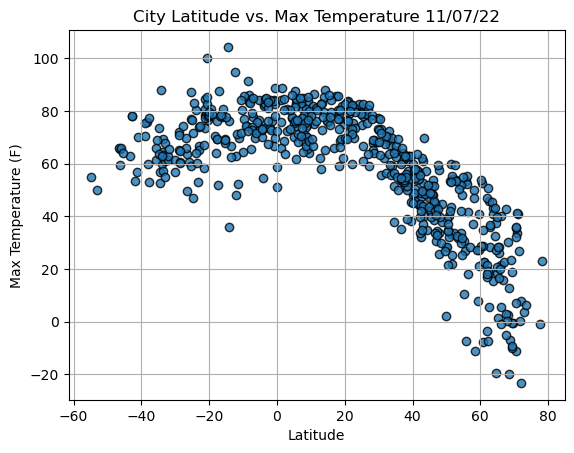

In [17]:
# Build the scatter plot for latitude vs max temperature.

plt.scatter(lats, 
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

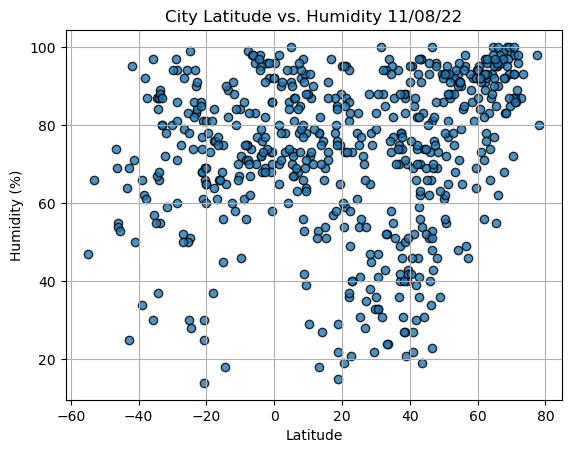

In [20]:
# Build the scatter plot for latitude vs humidity.

plt.scatter(lats, 
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig2.png')

# Show plot.
plt.show()

## Plot Latitude vs. Cloudiness

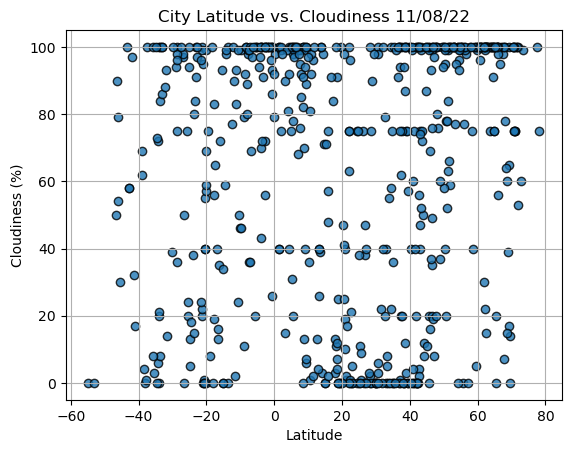

In [21]:
# Build the scatter plot for latitude vs cloudiness.

plt.scatter(lats, 
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig3.png')

# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

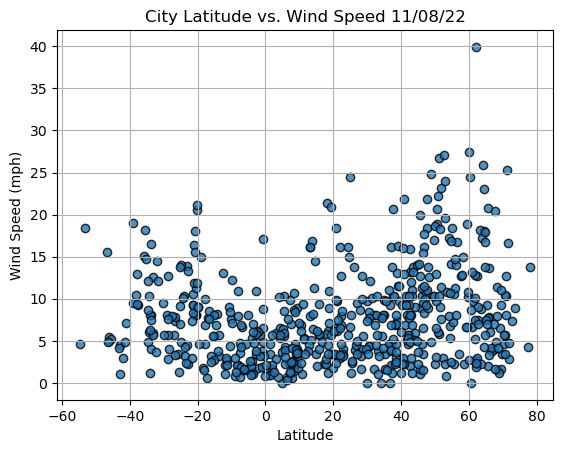

In [22]:
# Build the scatter plot for latitude vs wind speed.

plt.scatter(lats, 
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig4.png')

# Show plot.
plt.show()